### Simulating From the Null Hypothesis - two methods

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

H0:  u <= 70   
H1:  u > 70

# Method 1

In [1]:
#Import libraries, set the seed, and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

In [2]:
#create a sample from our data
sample_df = df.sample(150)

In [3]:
#create our bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [4]:
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [5]:
low, high = np.percentile(means, 2.5), np.percentile(means,97.5)

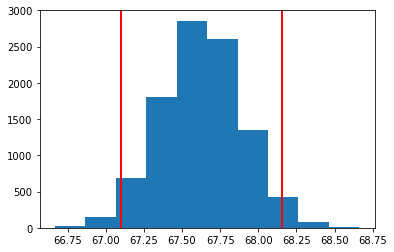

In [6]:
plt.hist(means);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);

# Methods 2:  
`1` In the hypothesis testing, we first simulate from the closest value to the Alterntive that is still in the null space    

In [7]:
# means = []
# for _ in range(10000):
  #  bootsample = sample_df.sample(150,replace=True)
  #  means.append(bootsample.height.mean())
np.std(means)

0.2658246390555901

In [8]:
# simulate using u = 70 and std 10000 time to see if H1 is true what the distribution look like
null_vals = np.random.normal(70, np.std(means), 10000)

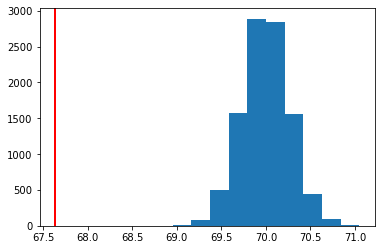

In [12]:
plt.hist(null_vals);
plt.axvline(x=sample_df.height.mean(), color='r', linewidth=2);

In [9]:
sample_df.height.mean()

67.63297688228066

since 67.63 is far to the left, **therfore H0 is true**

In [13]:
sample_mean = sample_df.height.mean()

In [14]:
print(sample_mean)

67.63297688228066


In [15]:
(null_vals > sample_mean)

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
# p-value calculation  p=1 indicating that H0 is most likely true
(null_vals > sample_mean).mean()

1.0

# What if use the following hypothesis?   
H0: u >= 70   
H1: u < 70   

In [17]:
(null_vals < sample_mean)

array([False, False, False, ..., False, False, False])

In [19]:
# p-value calculation  p = 0, indicating that H1 is most likely true
(null_vals < sample_mean).mean()

0.0

# What if use the following hypothesis?   
H0: u = 70   
H1: u != 70   

In [24]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()

0.0

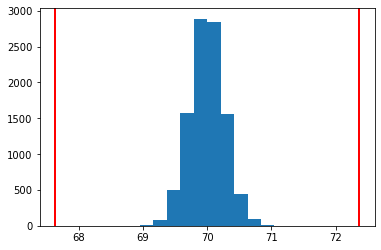

In [26]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(x=low, color='r', linewidth=2);
plt.axvline(x=high, color='r', linewidth=2);